In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('WineQT.csv')

# Get the names of columns
column_names = df.columns

# Print the column names
print("Column Names:")
for column in column_names:
    print(column)


Column Names:
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
Id


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Task 1: Load the dataset and display basic information
df = pd.read_csv('WineQT.csv')



In [3]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Task 2: Data Analysis Libraries (Pandas and Numpy)
# Use Pandas for data manipulation
# Use Numpy for array operations
print("\nData Analysis Libraries:")
# Example: Display mean and standard deviation of 'quality'
print("Mean of Quality:", np.mean(df['quality']))
print("Standard Deviation of Quality:", np.std(df['quality']))



Data Analysis Libraries:
Mean of Quality: 5.657042869641295
Standard Deviation of Quality: 0.805471666920189



Data Visualization:


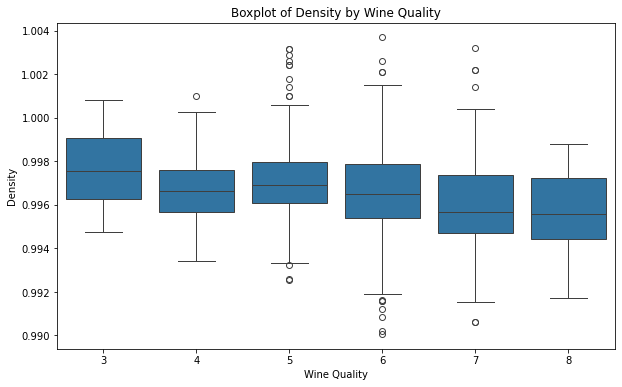

In [5]:
# Task 3: Data Visualization (Seaborn and Matplotlib)
# Visualizing patterns and insights in the dataset
print("\nData Visualization:")
# Example: Boxplot for 'density' vs 'quality'
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=df)
plt.title('Boxplot of Density by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()


In [6]:
# Task 4: Classifier Models (Random Forest, SGD, SVC)
# Preprocessing: Convert 'quality' to binary (Good or Bad)
df['quality_binary'] = np.where(df['quality'] >= 6, 1, 0)

# Features and target variable
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# SGD Classifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train)
sgd_predictions = sgd_classifier.predict(X_test)

# Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)

In [8]:
# Evaluate classifiers
print("\nClassifier Models Evaluation:")
# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# SGD Classifier
print("\nSGD Classifier Accuracy:", accuracy_score(y_test, sgd_predictions))
print("SGD Classifier Classification Report:\n", classification_report(y_test, sgd_predictions))
print("SGD Classifier Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))

# SVC Classifier
print("\nSupport Vector Classifier Accuracy:", accuracy_score(y_test, svc_predictions))
print("Support Vector Classifier Classification Report:\n", classification_report(y_test, svc_predictions))
print("Support Vector Classifier Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))


Classifier Models Evaluation:
Random Forest Accuracy: 0.7816593886462883
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.80      0.80      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

Random Forest Confusion Matrix:
 [[ 77  25]
 [ 25 102]]

SGD Classifier Accuracy: 0.4279475982532751
SGD Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.93      0.59       102
           1       0.30      0.02      0.04       127

    accuracy                           0.43       229
   macro avg       0.37      0.48      0.32       229
weighted avg       0.36      0.43      0.29       229

SGD Classifier Confusion Matrix:
 [[ 95   7]
 [124   3]]

Support Vector Classifier Accuracy: 

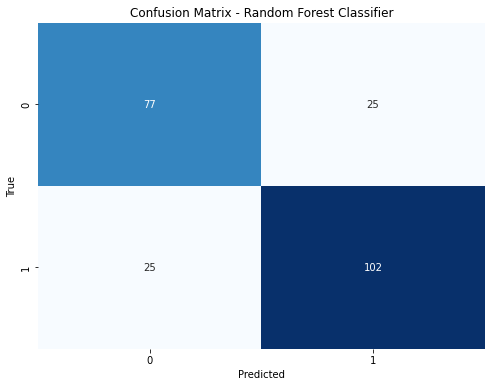

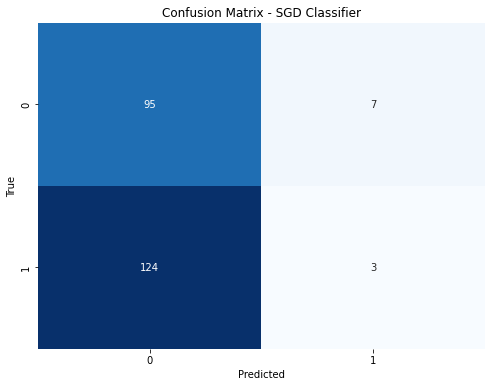

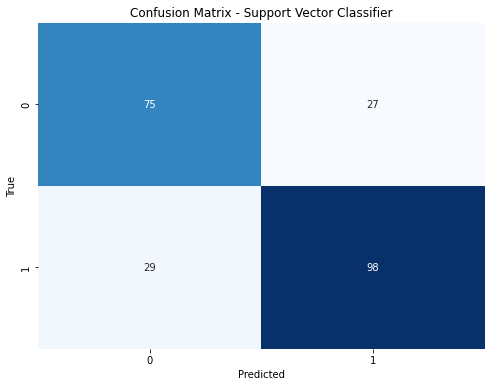

<ipython-input-10-8888e4a542ff>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=accuracies, palette='viridis')


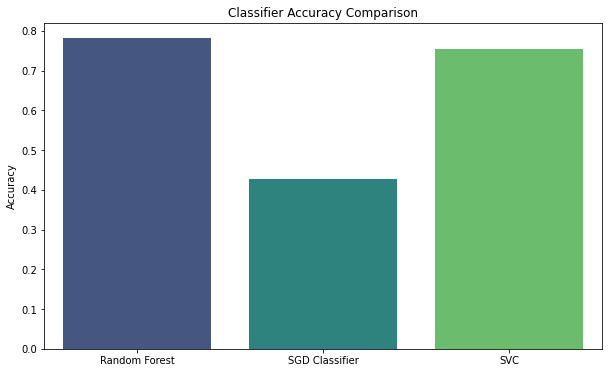

<ipython-input-10-8888e4a542ff>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='density', data=df, palette='muted')


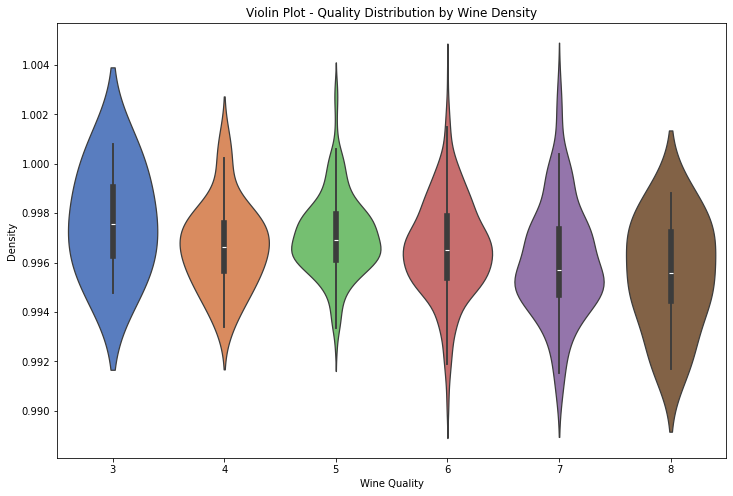

In [10]:
# Heatmap for Confusion Matrix of Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Heatmap for Confusion Matrix of SGD Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, sgd_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SGD Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Heatmap for Confusion Matrix of Support Vector Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svc_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Bargraph for Accuracy Comparison
classifiers = ['Random Forest', 'SGD Classifier', 'SVC']
accuracies = [accuracy_score(y_test, rf_predictions),
              accuracy_score(y_test, sgd_predictions),
              accuracy_score(y_test, svc_predictions)]

plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Violin Plot for Quality Distribution by Wine Density
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='density', data=df, palette='muted')
plt.title('Violin Plot - Quality Distribution by Wine Density')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()
